<a href="https://colab.research.google.com/github/arkaprabha10/Machine-Learning/blob/main/q2_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import svm
import tensorflow as tf
import keras as keras

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,784)
training_images = training_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)
training_images=StandardScaler().fit_transform(training_images)
test_images=StandardScaler().fit_transform(test_images)

In [16]:
# CNN architecture with 512 neurons and 10 output nodes.
# Dense layer uses relu activation function and the final layer employs the softmax function. An adam optimizer has been used.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(512, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4751 - accuracy: 0.8391
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3544 - accuracy: 0.8738
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3141 - accuracy: 0.8875
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2961 - accuracy: 0.8949
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2672 - accuracy: 0.9042
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2534 - accuracy: 0.9112
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2329 - accuracy: 0.9164
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2263 - accuracy: 0.9220
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2071 - accuracy: 0.9280
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.196

In [17]:
model.evaluate(test_images, test_labels)
print(model.metrics_names)

313/313 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.8721
['loss', 'accuracy']


In [ ]:
# SVM
def svm_func(x_train, x_test, y_train, y_test):
    k = ['linear', 'poly', 'rbf', 'sigmoid']

    for i in range(len(k)):
        clf = svm.SVC(kernel=k[i])
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        plot_confusion_matrix(k[i]+' kernel', y_test, y_pred)
    x_train_precomp = np.dot(x_train, x_train.T)
    x_test_precomp = np.dot(x_test, x_train.T)
    clf = svm.SVC(kernel='precomputed')
    clf.fit(x_train_precomp, y_train)
    y_pred = clf.predict(x_test_precomp)
    plot_confusion_matrix('precomputed kernel', y_test, y_pred)

svm_func(training_images, test_images, training_labels, test_labels)

In [ ]:
# Logistic regression
clf = LogisticRegression(max_iter=10000).fit(training_images, training_labels)
accuracy_inbuilt = accuracy_score(test_labels, clf.predict(test_images))


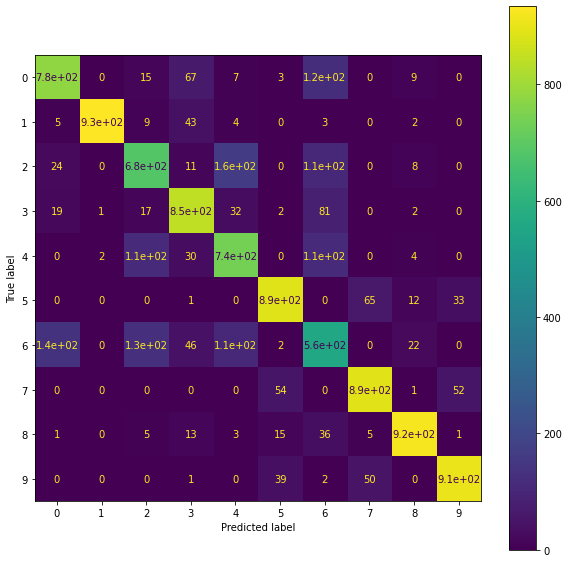

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1000
           1       1.00      0.93      0.96      1000
           2       0.70      0.68      0.69      1000
           3       0.80      0.85      0.82      1000
           4       0.70      0.74      0.72      1000
           5       0.89      0.89      0.89      1000
           6       0.55      0.56      0.55      1000
           7       0.88      0.89      0.89      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.81      0.82     10000



In [20]:
cm = confusion_matrix(test_labels, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
print(classification_report(test_labels,pred_data))

In [11]:
# LDA
clf = LinearDiscriminantAnalysis()
clf.fit(training_images, training_labels)
pred_data = clf.predict(test_images)


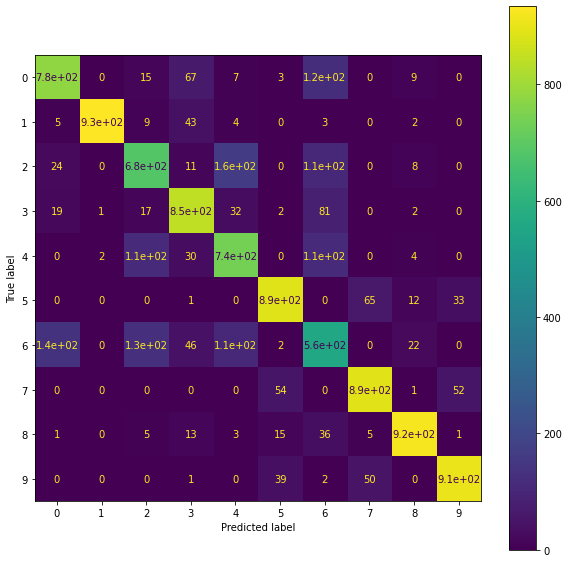

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1000
           1       1.00      0.93      0.96      1000
           2       0.70      0.68      0.69      1000
           3       0.80      0.85      0.82      1000
           4       0.70      0.74      0.72      1000
           5       0.89      0.89      0.89      1000
           6       0.55      0.56      0.55      1000
           7       0.88      0.89      0.89      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.81      0.82     10000



In [18]:
cm = confusion_matrix(test_labels, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
print(classification_report(test_labels,pred_data))